<div style="text-align: right">© Moon</div>

# Project Report: Evaluation of the Centrality Algorithm, PageRank (Second Edition)
***

## Introduction

Centrality algorithms are one of the categories of graph algorithms. They identify the important nodes in a given graph and those nodes are defined as vertices with many direct or indirect connections. One of the centrality algorithms is called $PageRank(PR)$. [1]Invented by Larry Page, PR is a link analysis algorithm used by Google Search to rank web pages in their search engine results. It ranks pages

 are important members of centrality algorithms which rank vertices of a graph by measuring the direct influence of nodes based on proportional rank. 

It is a link analysis algorithm and it assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set.

In this notebook, we will demonstrated about the concepts of PageRank algorithm and its theoretical and empirical complexity.

This notebook demonstrates:
- The PageRank algorithm
- Implementation the Classic PageRank algorithm and explore it on graphs generated from Networks, python library.
- Measuring the PR complexity theoretically
- Measuring the PR complexity empirically
- PR aglrotihm and adjusting limitations
- PR Implementation on Social media
- Topic-Specific (Personalized) PageRank
- Web Spam Detection Algorithms





***

## The PageRank Algorithm

The PageRank algorithm gives each page a rating of its importance, which is a recursively defined measure where by a page becomes important if important pages link to it. The page rank of any page is the probability that the random surfer will land on a particular page that the surfer is more likely to end up in important pages.

The behavior of the random surfer is an example of a Markov process, which depends only of the current state of a system. The algorithm moves moves from state to state, based on probability distribution of the likelihood of moving from each state to every other possible state. 



[2]PageRank is a link analysis algorithm and it assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The output of PR is the probability that a person randomly surfing will arrive arrive at any particular page. It is assumed that the input distribution is evenly divided at the beginning of PR process. 

PR takes three inputs; $number of pages$, damping factor, and a number of iterations. The PageRank relies on an arbitrary probability distribution in which a person randomly clicks on links will arrive at any particular page. The probability which a person independently will continue is a damping factor $d$. PR computations require iterations through a number of pages to adjust approximate PR values to the theoretical value.

[1]The result of node with a PR of 0.4 for instance, means there is 40% chance that a person randomly surf will be directed to the node. The implementation of the classic PageRank algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed.

```
There many PR algorithms.

```



## PR challenges

In order to implement PR in Web, we need to consider several things in order to implement.

Finding relevant and trusted documents in Web, are challenging.

Challenges
1. Finding trust sources:
    1.  trusted pages have point to each otehr
2. Finding "best" ranks
3. all web pages are not equally "important"; requires weight
4. There are a large diversity in the web-graph node connectivity; We need to rank pages by the link structure

***

- If a page j with importance rj has n out-links, each links receives rj/n scores.

`

***

## The PageRank Algorithm

The PageRank algorithm gives each page a rating of its
importance, which is a recursively defined measure whereby a
page becomes important if important pages link to it. 

The page rank of any page is the probability that the random surfer
will land on a particular page that the surfer is more likely to end up in important pages.

The behavior of the random surfer is an example of a Markov
process, which depends only of the current state of a system.  
The algorithm moves moves from state to state, based on probability distribution of the likelihood of moving from each state to every other possible state. 


### Algorithm Concepts
1. Start with a set of pages. 
2. Crawl the web to determine the link structure. 
3. Assign each page an initial rank of 1 / N. 
4. update the rank of each page by adding up the
weight of every page that links to it divided by the number
of links emanating from the referring page.
5. If a page has no outwardlinks, redistribute its rank equally among the other pages in
the graph. 
6. Apply this redistribution to every page in the graph. 
7. Repeat this process until the page ranks stabilize. 
8. In practice, the Page Rank algorithm adds a damping factor
at each stage to model the fact that users stop searching. 

### Algorithm Steps
The implementation of the classic PageRank algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed.

1. Initialize the PageRank of every node with a value of 1/n
2. Iterate through the graph. For each iteration, update the PageRank of every node in the graph.
   1. For the first page, it only processes through random walk. 
   2. For other pages, they can process through random walk or inter-page links. 
   3. Sum up the proportional rank from all of its in-neighbors
   4. Update the PageRank with the weighted sum of proportional rank and random walk
3. Normalize the PageRank when there is terminal point. PageRank value will converge after enough iterations
5. Return PR scores

***

## Limitations of the early PageRank 

In the early PageRank, there limitations:
- [5]Rank Sinks: A rank sink occurs when a page does not link out. Rank sinks occurs when by refusing to share. 

- [5]Hoarding: a group of pages that only link between each other will also monopolize PageRank, creating error. 

- [5]Circular references: A couple of pages that only link between themselves and do not link to any other page. The iterative process will never converge, creating infinity loop.


## Adjustment for PR

### First adjustment: Stochasticity Adjustment
The PageRank equation computation requires summations which takes more computation time. To save the time, we can uses matrices to convert summations n to simpler vector-matrix multiplication, which saves computation time. 

Matrices also take advantage of matrix algebra and Markov Chains theory. 
The value (0 or 1) indicates whether or not there is a link between the pages. Instead of using 1 to indicate a link, we use 1/x, where x is the number of non-zero elements in each row. This strategy turns the non-zero values into probabilities, and creates a row substochastic matrix. Basically, this means that when you add the values of each row, some of the totals will equal 1 and the rest will equal zero. The zero totals happen because of the dangling nodes or rank sinks. For a row stochastic matrix all the rows must add up to 1.

Leaving the matrix unmodified does not guarantee that the values will converge during iterations. In order to fix these problems, the first adjustment was introduced. It replaces all zero rows (dangling nodes/rank sinks) with 1/n eT (eT is a row vector of all 1s), making the matrix stochastic.


## Second adjustment: Primitivity Adjustment
Applying the Power Method to a Markov matrix converges to a unique as long as the matrix is stochastic, irreducible, and irregular.

Intuitively, the primitive adjustment can be thought of as a random surfer that gets bored sometimes while following the hyperlink structure of the Web, and, instead of following links at random, enters a new URL in the browser navigation bar and continues from there. A proportion of the time he will be following links at random and a proportion of the time he will be 'teleporting' to a new URL.

In order to model this mathematically, d (damping factor), it means that 85% of the time the surfer is following links at random, and 15% of the time he is entering new URLs in the browser bar.

A new matrix is born from this adjustment. Let's call it G, the Google matrix.

G = α S + (1 - α) 1/n eeT or G = α S + (1 - α) E, where E is the teleportation matrix. E = 1/n eeT (remember that eT is a row vector of all 1s)

The teleporting is random because the teleportation matrix E = 1/n eeT is uniform, which means that the random surfer is equally likely to jump to any page when he teleports.

One of the challenges for the designers of any search engine is
ensuring that a commercial interest can’t artificially increase its
ranking by creating many others pages whose only purpose is to
link to that company’s home page.

• Adopting the PageRank algorithm makes it harder for authors to
manipulate the system because the ranking of a page depends
on the prestige of important pages that are typically outside the
control of those who are seeking to game the system.

• Preventing users from manipulating their own web rankings is
an ongoing problem for all search engine companies. To help
ensure that the rankings remain fair, Google must keep the
details of the ranking algorithms secret and change them often
enough to outwit the would-be saboteurs.



***

## Page Rank Algorithm

***

## Assumption

For each node take the difference in PR score between the current iteration and the last iteration, if this error falls below a certain point the graph has converged.

Starting from arbitrary values assigned to each node in the graph, the computation iterates until convergence below a given threshold is achieved.

[6]Convergence is achieved when the error rate for any vertex in the graph falls below a given threshold value. The error rate of a vertex comuted by difference between the “real” score of the vertex PR(Vi) and the score computed at iteration I, PR^I(Vi) . The error rate is approximated at PR^(I+1)(Vi)+ PR^(I)(Vi).


The computation of PR has no issue, if disregard scales. As damping factor increases, the rate of convergence also increases.

The PageRank algorithm was designed for directed graphs. For this study, we will be using only directed graphs generated from NetworkX library. We will use damping factor as 0.85 and number of iterations as 100.


The PageRank algorithm was designed for directed graphs. There are several factors


The output (Numpy matrix) represents the transition matrix that describes the Markov chain used in PageRank. For PageRank to converge to a unique solution that there must be exists a path between every pair of nodes in the graph. Otherwise, there is a risk of being invalidated PR rank.

    """Returns the PageRank of the nodes in the graph.

    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.

    Parameters
    ----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.

    d : float, optional
      Damping factor for PageRank, default=0.85.

    personalization: dict, optional
      a nodes personalization value will be zero.
      By default, a uniform distribution is used.

    max_iter : integer, optional
      Maximum number of iterations in power method eigenvalue solver.

    tol : float, optional
      Error tolerance used to check convergence in power method solver.

    weight : weights are set to 1.

    dangling: dict, optional
      The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. 
      The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified). This must be selected to result in an irreducible transition
      matrix. It may be common to have the
      dangling dict to be the same as the personalization dict.


    Returns
    -------
    pagerank : dictionary
       Dictionary of nodes with PageRank as value


# PageRank Implementation on other graphs

The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. The iteration will stop after an error tolerance of len(G) * tol has been reached. If the number of iterations exceed max_iter, a networkx.exception.PowerIterationFailedConvergence exception is raised.

The PageRank algorithm was designed for directed graphs and if the input graph is directed and will execute on undirected graphs by converting each edge in the directed graph to two edges.

### Assumption
- personalization is uniform distribution
    nstart : dictionary, optional
      Starting value of PageRank iteration for each node.

weight:
    edge data key to use as weight. Set to 1

dangling: dict, optional
   The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified). This must be selected to result in an irreducible transition
      matrix (see notes under google_matrix). It may be common to have the
      dangling dict to be the same as the personalization dict.

      The outedges to be assigned to any "dangling" nodes, i.e., nodes without
      any outedges. The dict key is the node the outedge points to and the dict
      value is the weight of that outedge. By default, dangling nodes are given
      outedges according to the personalization vector (uniform if not
      specified). This must be selected to result in an irreducible transition
      matrix (see notes under google_matrix). It may be common to have the
      dangling dict to be the same as the personalization dict.

## Parameters

| **Input Argument** | **Type** | **Comment**                                       | 
|--------------------|----------|---------------------------------------------------|
| G                  | graph    | input graph; Undirected graphs will be converted to a directed graph with two directed edges for each undirected edge. |
| n                  | int      | total number of nodes of given graph (G)          |     
| d                  | float, optional    | damping factor; the probability of random walk; default=0.85.                                   |
| I                  | int, optional    | the number of iteration; Maximum number of iterations in power method; default=100 eigenvalue solver.                       |
| tol | float | Error tolerance used to check convergence in power method solver.



In [85]:
# Import Packages

# data science packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random

# 
from warnings import warn
import networkx as nx
from time import perf_counter
from random import randint
%matplotlib inline


In [86]:
def pageRank(G, d=0.85, I=100, tol=1.0e-6, weight="weight"):
    # edge case:
    if len(G) == 0:                                         # O(1)
            return {}

    D = G.to_directed()                                     # O(n + m); graph conversions

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight)                      # O(n^2); build a matrix and assign weight
    # get total number nodes of graph
    N = W.number_of_nodes()                                 # O(1); call stochastic_graph function which compute the number of nodes       
    
    # Initialize the PageRank of every node with a value of 1/n | O(n) 
    PR = dict.fromkeys(W, 1.0 / N)
    
    # Assign uniform personalization vector
    p = dict.fromkeys(W, 1.0 / N)
    
    # Set dangling_weights to persolization vector
    dangling_weights = p                                     # O(1); assign value      
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]           # O(n) building array
    
    # power iteration: make up to I iterations                          # Total O(I * n) = O(I)    
    for _ in range(I):
        PRlast = PR                                                     # O(1) - assign value & computation
        PR = dict.fromkeys(PRlast.keys(), 0)                            # O(1) - assign value & computation
        danglesum = d * sum(PRlast[n] for n in dangling_nodes)          # O(1) - assign value & computation
        
        
        for n in PR:                                                    # O(n) - assign value & computation
            # this matriPR multiply looks odd because it is
            # doing a left multiply PR^T=PRlast^T*W
            for _, nbr, wt in W.edges(n, data=weight):                  # O(m)
                PR[nbr] += d * PRlast[n] * wt                           # O(1) - assign value & computation
            PR[n] += danglesum * dangling_weights.get(n, 0) + (1.0 - d) * p.get(n, 0)       # O(1) - assign value & computation
        # check convergence, l1 norm
        err = sum(abs(PR[n] - PRlast[n]) for n in PR)                   # O(1) - assign value & computation
        if err < N * tol:                                               # O(1) - comparison
            print('Convergence Test Passed!')                              # O(1) - assign value & computation
            return PR                                                   # O(1) - assign value & computation
    
    print('convergence failed')                                         # O(1) - assign value & computation
    # raise nx.PowerIterationFailedConvergence(I)
    

# Canonical Test

The eigenvector calculation is done by the power iteration method and has no guarantee of convergence. Our PR script (I=100, d = 0.85) include convergence test and will test our sample data by calling PR.



### Samples Description Chart

| **Notation** | **Type of Graph** | **Comment**                                       | 
|--------------------|----------|---------------------------------------------------|
| G1                  | path graph    | [8]path graph linearly connected nodes.; nx.DiGraph(nx.path_graph(4)) |
| G2                  | a scale-free directed graph      | [9]used in previous project; nx.scale_free_graph(n)
| G3                  | undirected graph  | [10] returns the Margulis-Gabber-Galil undirected MultiGraph on n^2 nodes.; regular with degree 8. Nodes are integer pairs. The second-largest eigenvalue of the adjacency matrix of the graph is at most 5 sqrt{2}, regardless of n.                             |
| G4                  | weighted graph   | Returns Zachary's Karate Club graph; has Each node in the returned graph has a node attribute 'club' tha t indicates the name of the club to which the member represented by that node belongs, either 'Mr. Hi' or 'Officer'. Each edge has a weight based on the number of contexts in which that edge's incident node members interacted.|  
| G5 | biparitite graph | Returns Davis Southern women social network. This is a bipartite graph. | 
| G6 | weighted graph | florentine_families_graph()[source]: Returns Florentine families graph.


In [87]:
# Size of samples

G1 = nx.DiGraph(nx.path_graph(36))
G2 = nx.scale_free_graph(36)
G3 = nx.margulis_gabber_galil_graph(6)
G4 = nx.karate_club_graph()
G5 = nx.davis_southern_women_graph()
G6 = nx.florentine_families_graph()

Samples = [G1, G2, G3, G4, G5, G6]

# return graph sample's nodes & edges
for G in Samples:
    print(G) 


DiGraph with 36 nodes and 70 edges
MultiDiGraph with 36 nodes and 78 edges
MultiGraph named 'margulis_gabber_galil_graph(6)' with 36 nodes and 144 edges
Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Graph with 32 nodes and 89 edges
Graph with 15 nodes and 20 edges


In [88]:
# Convergence Test
for num, G in enumerate(Samples, 1):
    print('Sample Graph {num} Test Result:'.format(num=num))
    pageRank(G)
    print()

Sample Graph 1 Test Result:
Convergence Test Passed!

Sample Graph 2 Test Result:
Convergence Test Passed!

Sample Graph 3 Test Result:
Convergence Test Passed!

Sample Graph 4 Test Result:
Convergence Test Passed!

Sample Graph 5 Test Result:
Convergence Test Passed!

Sample Graph 6 Test Result:
Convergence Test Passed!



***

## Theoretical Analysis

Refer to the PageRank algorithm and the script in the previous cells. <br>
The implementation of above PR algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed. <br>

The time complexity depends on I, number of iterations and N, total number of nodes.

The main loop runs I times, which is total number of iteration. <br>
The inner loo p runs n times, which is the number of nodes generated <br>
<br>

The time complexity’s value is O(I * N) where I represents the specific number of iterations that needs to be run on node N. 
The space complexity’s value is O(N) where n is total number of nodes. since we keep only the given nodes information. 

***

## Empirical Time Complexity

The empirical time analysis function takes number of nodes, pageRank function, and graph generation function.
We will use the time.perf_counter to measure time and use a log scale plot to show small variations at a detailed level.

In [89]:
# nx.number_of_nodes return total number of nodes of a graph

# Disable printing convergence test result

import os
import sys

# Disable printing convergence test result
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

def measure_cost(G, pageRank):
    t = []
    PR = None
    num_nodes = nx.number_of_nodes(G)
    
    for n in range(num_nodes):
        runs = []
        st = perf_counter()
        for i in range(n):
            # Disable printing convergence test result; only time will return
            with HiddenPrints():
                PR = pageRank(G)
            runs += [perf_counter()-st]
        t += [np.mean(runs)]
    

    print('clock: ', ' '.join(['{:g}'.format(v) for v in t]))
    # PR dataset can be used for search
    return t, PR, num_nodes
    # return t, num_nodes


'''
[5]E. Guven, module05_ds, Jhu.edu. (2022).<br> https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).<br>
'''


'\n[5]E. Guven, module05_ds, Jhu.edu. (2022).<br> https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).<br>\n'

In [137]:
# Find time 
t1, PR1, num_nodes1 = measure_cost(G1, pageRank)
t2, PR2, num_nodes2 = measure_cost(G2, pageRank)
t3, PR3, num_nodes3 = measure_cost(G3, pageRank)
t4, PR4, num_nodes4 = measure_cost(G4, pageRank)
t5, PR5, num_nodes5 = measure_cost(G5, pageRank)
t6, PR6, num_nodes6 = measure_cost(G6, pageRank)

total_time1 = t1[-1]
total_time2 = t2[-1]
total_time3 = t3[-1]
total_time4 = t4[-1]
total_time5 = t5[-1]
total_time6 = t6[-1]

/Users/Moon/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Moon/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


clock:  nan 0.027502 0.0258265 0.047333 0.0600451 0.724344 0.671739 0.706542 0.573938 0.108272 0.0742426 0.0720234 0.0729003 0.0966323 0.101232 0.0909867 0.0963199 0.101674 0.115773 0.1132 0.132832 0.223947 0.13705 0.282765 0.156073 0.186808 0.166604 0.200794 0.193393 0.182816 0.191311 0.20116 0.181031 0.217939 0.252421 0.205715
clock:  nan 0.00457041 0.00576869 0.00926192 0.0107632 0.0121065 0.0150979 0.0157807 0.0181932 0.0210604 0.0242408 0.0315035 0.0269416 0.0289392 0.0298569 0.03998 0.0479521 0.036364 0.03879 0.0424751 0.0434564 0.049543 0.0492484 0.0486672 0.0551015 0.0525637 0.0600529 0.0814964 1.14411 0.459268 0.0761824 0.0759424 0.0782131 0.0810589 0.0783313 0.0973219
clock:  nan 0.0100413 0.0152044 0.0182231 0.0272317 0.0353178 0.0366139 0.0498809 0.0415489 0.0431833 0.0469689 0.0473944 0.0503301 0.0527607 0.0587304 0.0679254 0.0674674 0.0764241 0.805652 0.523238 0.0966116 0.0936529 0.170217 0.118538 0.161087 0.13754 0.110616 0.105735 0.111474 0.113644 0.126599 0.196622 0.12

***

In [116]:
# G4, G5, G6 have less than 36 nodes. In order to visualize data, we adds None value
def resize(t):
    t = t
    diff = 36 - len(t)
    for i in range(diff):
        t.append(np.nan)
    return len(t)
        
resize(t4)
resize(t5)
resize(t6)

36

'\nReferences\n----------\n[5]E. Guven, module05_ds, Jhu.edu. (2022).\nhttps://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).\n'

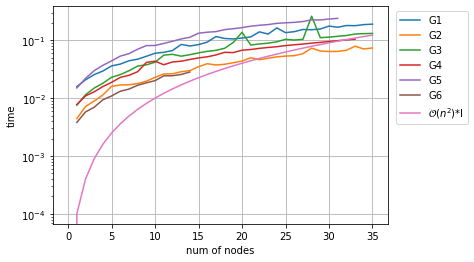

In [117]:
# Plot
# {'Graph size $n$': [n for n in range(25)],
df = pd.DataFrame( {'G1': t1,
                   'G2': t2,
                   'G3': t3,
                   'G4': t4,
                   'G5': t5,
                   'G6': t6,
                   '$\mathcal{O}(n^2)$*I':     [100 * 1e-6*n**2 for n in range(36)],
                #    '$\mathcal{O}(n^2)$':     [1e-6*n**2 for n in range(36)],
                   })

# df.set_index('Graph size $n$', drop=True, inplace=True)

fig = df.plot().get_figure()

plt.legend(bbox_to_anchor=(1.01, 1.0))
plt.ylabel('time')
plt.grid()
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('num of nodes traversed (')

# fig.savefig('page_Rank_01.png')
'''
References
----------
[5]E. Guven, module05_ds, Jhu.edu. (2022).
https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).
'''


In [142]:

total_times = [(t1[-1], 'G1'), (t2[-1], 'G2'), (t3[-1], 'G3'), (t4[-1], 'G4'), (t5[-1], 'G5'), (t6[-1], 'G6')]
print(total_times)


[(0.205714603742516, 'G1'), (0.0973218906571544, 'G2'), (0.13775312939921736, 'G3'), (0.11028039202960138, 'G4'), (0.2900087053556255, 'G5'), (0.02737943178518825, 'G6')]


### Samples Description Chart

| **Notation** | **Type of Graph** | **num of nodes** | **num of edges** | **Comment**                                       | 
|--------------------|----------|-|-|---------------------------------------------------|
| G1                  | path graph    | 36 |70| [8]path graph linearly connected nodes.; nx.DiGraph(nx.path_graph(4)) |
| G2                  | a scale-free directed graph      |36|78| [9]used in previous project; nx.scale_free_graph(n)
| G3                  | undirected graph  |36|144| [10] returns the Margulis-Gabber-Galil undirected MultiGraph on n^2 nodes.; regular with degree 8. Nodes are integer pairs. The second-largest eigenvalue of the adjacency matrix of the graph is at most 5 sqrt{2}, regardless of n.                             |
| G4                  | weighted graph   | 34 | 78 | [11]Returns Zachary's Karate Club graph; has Each node in the returned graph has a node attribute 'club' tha t indicates the name of the club to which the member represented by that node belongs, either 'Mr. Hi' or 'Officer'. Each edge has a weight based on the number of contexts in which that edge's incident node members interacted.|  
| G5 | biparitite graph | 32 | 89 | [12]Returns Davis Southern women social network. This is a bipartite graph. | 
| G6 | weighted graph |15 |20 |[13]florentine_families_graph(); Returns Florentine families graph.


## Time Complexity
Fastest < - > Slowest
G6 < 

Our result shows that G2, the scale-free directed graph is fastest and G1 is slowest. As node size increases, all samples of time complexity became closed to O(I * n).

***

In [ ]:
# Plot
def plot(G, time, num_nodes):
    df = pd.DataFrame({'Graph size $n$': [n for n in range(num_nodes)],
                    str(G): time,
                    '$\mathcal{O}(n^2)$*I':     [100 * 1e-6*n**2 for n in range(num_nodes)],
                    '$\mathcal{O}(n^2)$':     [1e-6*n**2 for n in range(num_nodes)],
                    })

    df.set_index('Graph size $n$', drop=True, inplace=True)

    fig = df.plot().get_figure()

    plt.legend(bbox_to_anchor=(1.01, 1.0))

    plt.ylabel('time')
    plt.grid()
    plt.xscale('linear')
    plt.yscale('log')

# fig.savefig('page_Rank_01.png')
'''
References
----------
[5]E. Guven, module05_ds, Jhu.edu. (2022).
https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).
'''


'\nReferences\n----------\n[5]E. Guven, module05_ds, Jhu.edu. (2022).\nhttps://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).\n'

***

## References
[1] A. Langville and C. Meyer,
    "A survey of eigenvector methods of web information retrieval."
    http://citeseer.ist.psu.edu/713792.html
[2] Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry,
    The PageRank citation ranking: Bringing order to the Web. 1999
    http://dbpubs.stanford.edu:8090/pub/showDoc.Fulltext?lang=en&doc=1999-66&format=pdf
